In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path_to_file = '../../data/covid19_DTM/interim/RESTORE/'
RESTORE_df = pd.read_csv(path_to_file+'all_RESTORE_simulations.csv', header=[0,1,2,3,4],index_col=0, parse_dates=True)
from covid19_DTM.data import sciensano
df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)
df_hosp = df_hosp.groupby(by=['date']).sum()

In [15]:
df_sciensano = df_hosp

In [16]:
def _apply_tick_locator(ax):
    """support function to apply default ticklocator settings"""
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    return ax

colorscale_okabe_ito = {"orange" : "#E69F00", "light_blue" : "#56B4E9",
                        "green" : "#009E73", "yellow" : "#F0E442",
                        "blue" : "#0072B2", "red" : "#D55E00",
                        "pink" : "#CC79A7", "black" : "#000000"}
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler('color',
                                  list(colorscale_okabe_ito.values())),
    "font.size": 15,
    "lines.linewidth" : 3,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "ytick.major.left": True,
    "axes.grid": True
})

## Key moment 1: Prelude of second COVID-19 wave

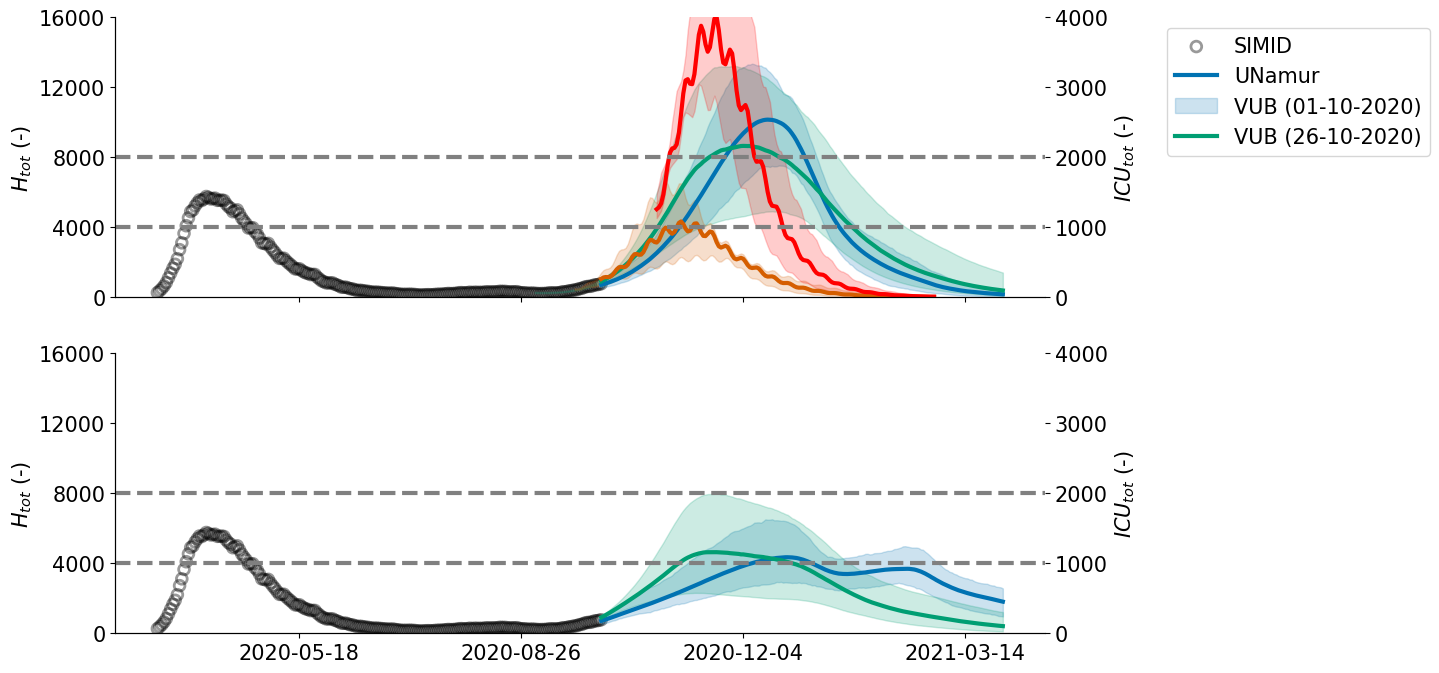

In [17]:
report_version = 'v4.2'
authors = ['SIMID','UNamur','VUB'] 
colors = [colorscale_okabe_ito['blue'], colorscale_okabe_ito['green'], colorscale_okabe_ito['red']]
report_date = '2020-10-01'

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,8),sharex=True)
# Scenario 1
ax1.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
ax2.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
for idx,author in enumerate(authors):
    color = colors[idx]
    ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1', 'load', 'mean'], color=color)
    ax1.fill_between(RESTORE_df.index, RESTORE_df[author, report_version, 'S1', 'load', 'LL'], RESTORE_df[author, report_version, 'S1', 'load', 'UL'], color=color, alpha=0.2)
    if author != 'VUB':
        ax2.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S2', 'load', 'mean'], color=color)
        ax2.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S2', 'load', 'LL'], RESTORE_df[report_date:][author, report_version, 'S2', 'load', 'UL'], color=color, alpha=0.2)

author = 'VUB'
report_version = 'v5.0'
scenario = 'S1_2610'
color='red'
ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, scenario, 'load', 'mean'], color=color)
ax1.fill_between(RESTORE_df.index, RESTORE_df[author, report_version, scenario, 'load', 'LL'], RESTORE_df[author, report_version, scenario, 'load', 'UL'], color=color, alpha=0.2)
#ax1.set_title('S1: Current contact behaviour')        
#ax2.set_title('S2: -10% contacts')
maxy=16000
ax_ICU1 = ax1.twinx()
ax_ICU1.set_ylim(0,maxy*0.25)
ax_ICU1.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU1.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax_ICU2 = ax2.twinx()
ax_ICU2.set_ylim(0,maxy*0.25)
ax_ICU2.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU2.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax1.set_ylim([0,maxy]) 
ax2.set_ylim([0,maxy]) 

ax1.set_ylabel('$H_{tot}$ (-)', fontsize=15)
ax2.set_ylabel('$H_{tot}$ (-)', fontsize=15)
ax_ICU1.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)
ax_ICU2.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)

legend_text = ['SIMID', 'UNamur', 'VUB (01-10-2020)', 'VUB (26-10-2020)']
ax1.legend(legend_text, bbox_to_anchor=(1.12, 1), loc='upper left', fontsize=15)

ax1.grid(False)
ax2.grid(False)
ax_ICU1.grid(False)
ax_ICU2.grid(False)

ax1 = _apply_tick_locator(ax1)
ax2 = _apply_tick_locator(ax2)
ax_ICU1 = _apply_tick_locator(ax_ICU1)
ax_ICU2 = _apply_tick_locator(ax_ICU2)

fig.savefig('../../results/covid19_DTM/RESTORE/manuscript/report4-2.pdf', dpi=300, bbox_inches='tight')

## Key moment 2: Christmass

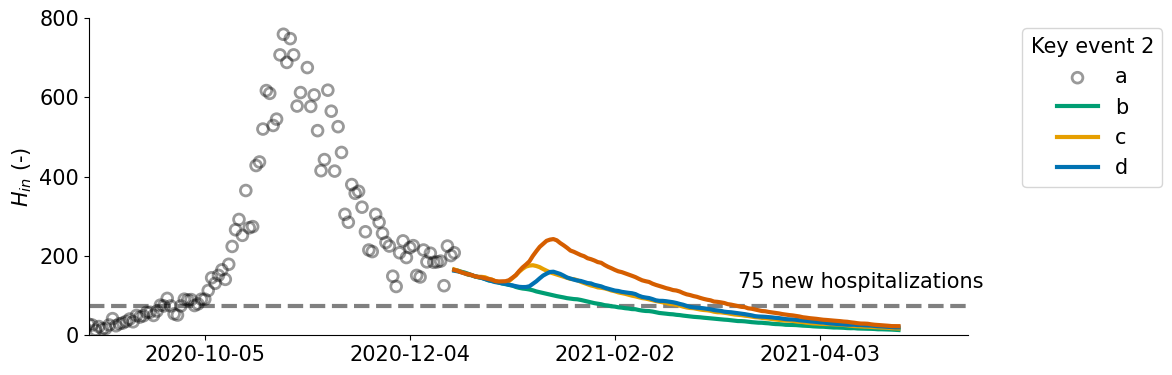

In [18]:
report_version = 'v6.0'
author = 'ULB'
scenarios = ['S1','S_Xmas1', 'S_Xmas2', 'S_Xmas3']
colors = [colorscale_okabe_ito['green'], colorscale_okabe_ito['orange'], colorscale_okabe_ito['blue'],
             colorscale_okabe_ito['red']]
report_date = '2020-12-17'

fig,ax = plt.subplots(figsize=(12,4))
ax.scatter(df_sciensano[:report_date].index,df_sciensano['H_in'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
for idx, scenario in enumerate(scenarios):
    color = colors[idx]
    ax.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, scenario, 'incidences', 'mean'], color=color)

ax.set_xlim(['2020-09-01',None])    
ax.set_ylim([0,800]) 
ax.set_ylabel('$H_{in}$ (-)', fontsize=15)
legend_text = ['a','b', 'c', 'd']
legend = ax.legend(legend_text, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
legend.set_title("Key event 2") 
ax.axhline(75, c='gray', linestyle='dashed', zorder=-10)
#ax.axvline(pd.Timestamp('2021-01-28'), c='gray', linestyle='dashed', zorder=-10)
#ax.axvline(pd.Timestamp('2021-02-21'), c='gray', linestyle='dashed', zorder=-10)
#ax.axvline(pd.Timestamp('2021-03-10'), c='gray', linestyle='dashed', zorder=-10)
ax.text(pd.Timestamp('2021-03-10'),120, '75 new hospitalizations', fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
ax.grid(False)
ax = _apply_tick_locator(ax)

plt.tight_layout()
fig.savefig('../../results/covid19_DTM/RESTORE/manuscript/Xmas.pdf', dpi=300, bbox_inches='tight')

## Key moment 3: VOC + vaccinations

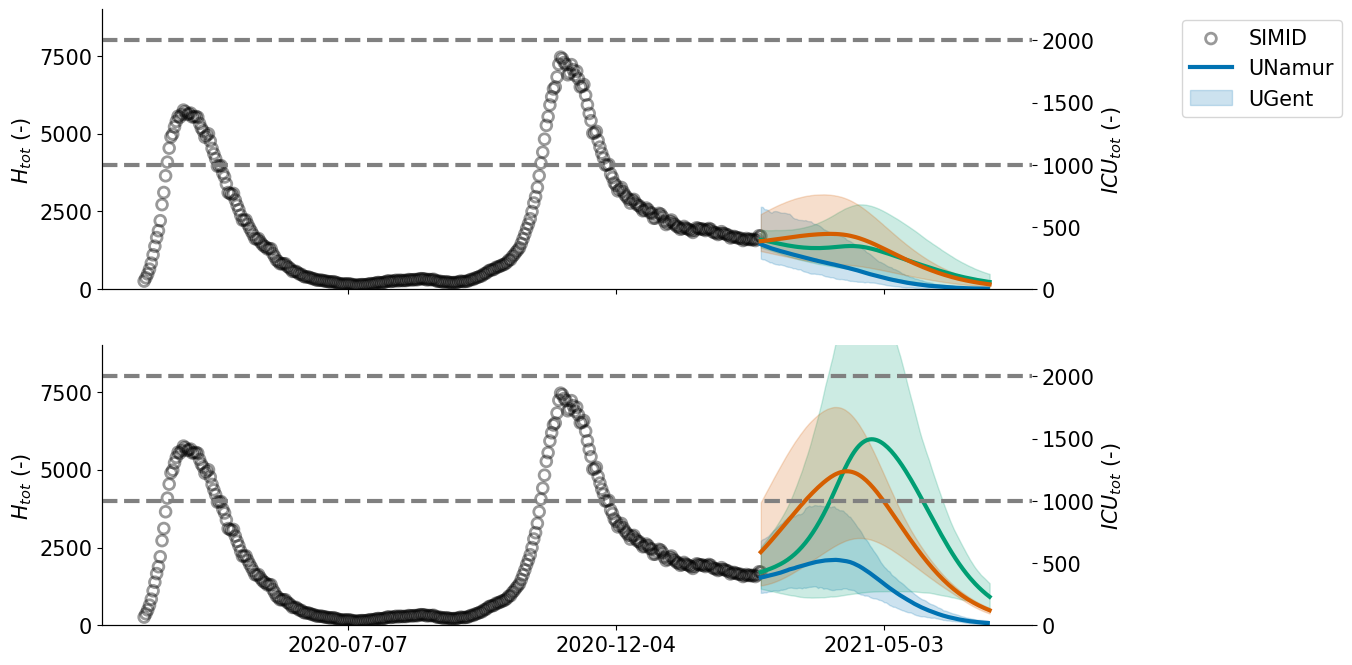

In [19]:
report_version = 'v7.0'
authors = ['SIMID','UNamur','UGent'] 
colors = [colorscale_okabe_ito['blue'], colorscale_okabe_ito['green'], colorscale_okabe_ito['red']]
report_date = '2021-02-23'
load_incidence = 'load'

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,8),sharex=True)
# Scenario 1
ax1.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
ax2.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
for idx,author in enumerate(authors):
    color = colors[idx]
    if author == 'SIMID':
        offset = 1.50
        ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'mean']*offset, color=color)
        ax1.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'UL']*offset, color=color, alpha=0.2)
        offset = 1.10
        ax2.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'mean']*offset, color=color)
        ax2.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'UL']*offset, color=color, alpha=0.2)
    elif author == 'UGent':
        offset = 1.10
        ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'mean']*offset, color=color)
        ax1.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'UL']*offset, color=color, alpha=0.2)
        offset = 1
        ax2.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'mean']*offset, color=color)
        ax2.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'UL']*offset, color=color, alpha=0.2)

    elif author == 'UNamur':
        offset = 1.10
        ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'mean']*offset, color=color)
        ax1.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1a', load_incidence, 'UL']*offset, color=color, alpha=0.2)
        offset = 0.90
        ax2.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'mean']*offset, color=color)
        ax2.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'LL']*offset, RESTORE_df[report_date:][author, report_version, 'S1b', load_incidence, 'UL']*offset, color=color, alpha=0.2)

maxy=9000
ax1.set_ylim([0,maxy]) 
ax2.set_ylim([0,maxy]) 

ax1.set_ylabel('$H_{tot}$ (-)', fontsize=15)
ax2.set_ylabel('$H_{tot}$ (-)', fontsize=15)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

ax_ICU1 = ax1.twinx()
ax_ICU1.set_ylim(0,maxy*0.25)
ax_ICU1.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU1.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax_ICU2 = ax2.twinx()
ax_ICU2.set_ylim(0,maxy*0.25)
ax_ICU2.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU2.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax_ICU1.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)
ax_ICU2.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)

legend_text = ['SIMID', 'UNamur', 'UGent']
ax1.legend(legend_text, bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=15)

ax1.grid(False)
ax2.grid(False)
ax_ICU1.grid(False)
ax_ICU2.grid(False)

ax1 = _apply_tick_locator(ax1)
ax2 = _apply_tick_locator(ax2)
ax_ICU1 = _apply_tick_locator(ax_ICU1)
ax_ICU2 = _apply_tick_locator(ax_ICU2)

ax_ICU1.set_yticks((0,500,1000,1500,2000))
ax_ICU2.set_yticks((0,500,1000,1500,2000))

fig.savefig('../../results/covid19_DTM/RESTORE/manuscript/report7-0.pdf', dpi=300, bbox_inches='tight')

## Key moment 4: To release or not to release measures?

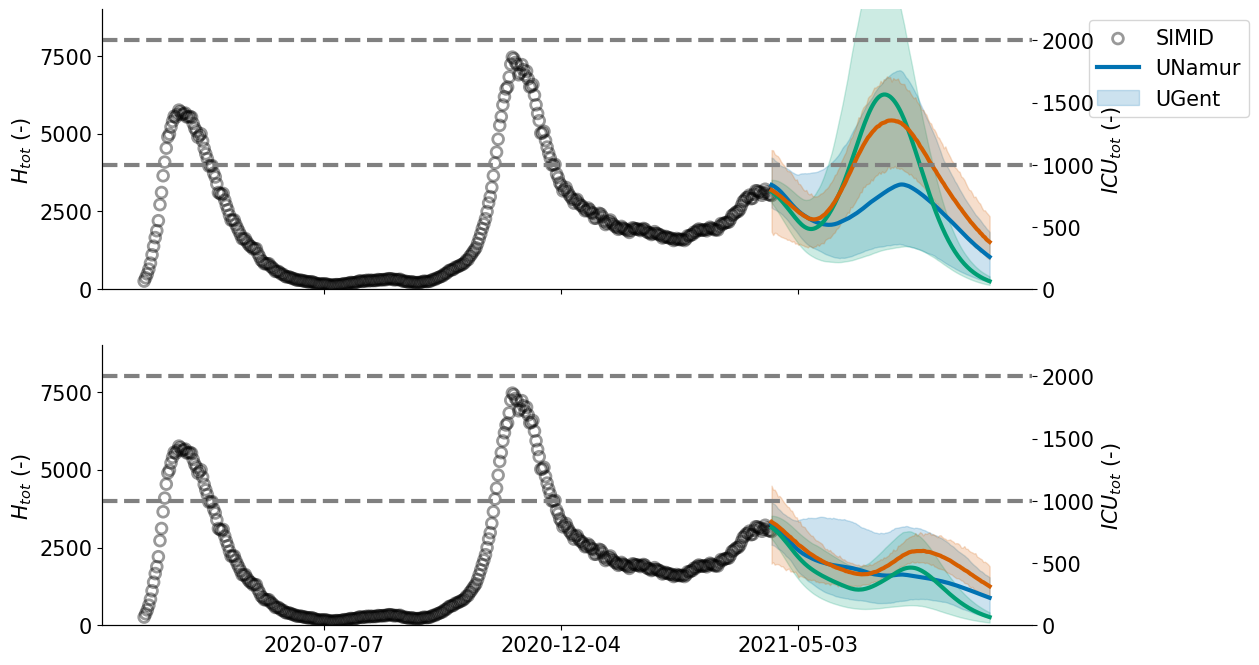

In [20]:
report_version = 'v8.0'
authors = ['SIMID','UNamur','UGent'] 
colors = [colorscale_okabe_ito['blue'], colorscale_okabe_ito['green'], colorscale_okabe_ito['red']]
report_date = '2021-04-16'
load_incidence = 'load'

fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,8),sharex=True)
# Scenario 1
ax1.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
ax2.scatter(df_sciensano[:report_date].index,df_sciensano['H_tot'][:report_date], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
for idx,author in enumerate(authors):
    color = colors[idx]
    ax1.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S2', load_incidence, 'mean'], color=color)
    ax1.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S2', load_incidence, 'LL'], RESTORE_df[report_date:][author, report_version, 'S2', load_incidence, 'UL'], color=color, alpha=0.2)
    ax2.plot(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S4', load_incidence, 'mean']*offset, color=color)
    ax2.fill_between(RESTORE_df[report_date:].index, RESTORE_df[report_date:][author, report_version, 'S4', load_incidence, 'LL'], RESTORE_df[report_date:][author, report_version, 'S4', load_incidence, 'UL'], color=color, alpha=0.2)

maxy=9000
ax1.set_ylim([0,maxy]) 
ax2.set_ylim([0,maxy]) 

ax1.set_ylabel('$H_{tot}$ (-)', fontsize=15)
ax2.set_ylabel('$H_{tot}$ (-)', fontsize=15)

ax_ICU1 = ax1.twinx()
ax_ICU1.set_ylim(0,maxy*0.25)
ax_ICU1.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU1.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax_ICU2 = ax2.twinx()
ax_ICU2.set_ylim(0,maxy*0.25)
ax_ICU2.axhline(1000, c='gray', linestyle='dashed', zorder=-10)
ax_ICU2.axhline(2000, c='gray', linestyle='dashed', zorder=-10)

ax_ICU1.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)
ax_ICU2.set_ylabel('$ICU_{tot}$ (-)', fontsize=15)


for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
legend_text = ['SIMID', 'UNamur', 'UGent']
ax1.legend(legend_text, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)

ax1.grid(False)
ax2.grid(False)
ax_ICU1.grid(False)
ax_ICU2.grid(False)

ax1 = _apply_tick_locator(ax1)
ax2 = _apply_tick_locator(ax2)
ax_ICU1 = _apply_tick_locator(ax_ICU1)
ax_ICU2 = _apply_tick_locator(ax_ICU2)

ax_ICU1.set_yticks((0,500,1000,1500,2000))
ax_ICU2.set_yticks((0,500,1000,1500,2000))

fig.savefig('../../results/covid19_DTM/RESTORE/manuscript/report8-0.pdf', dpi=300, bbox_inches='tight')

## Visualize hospitalization data

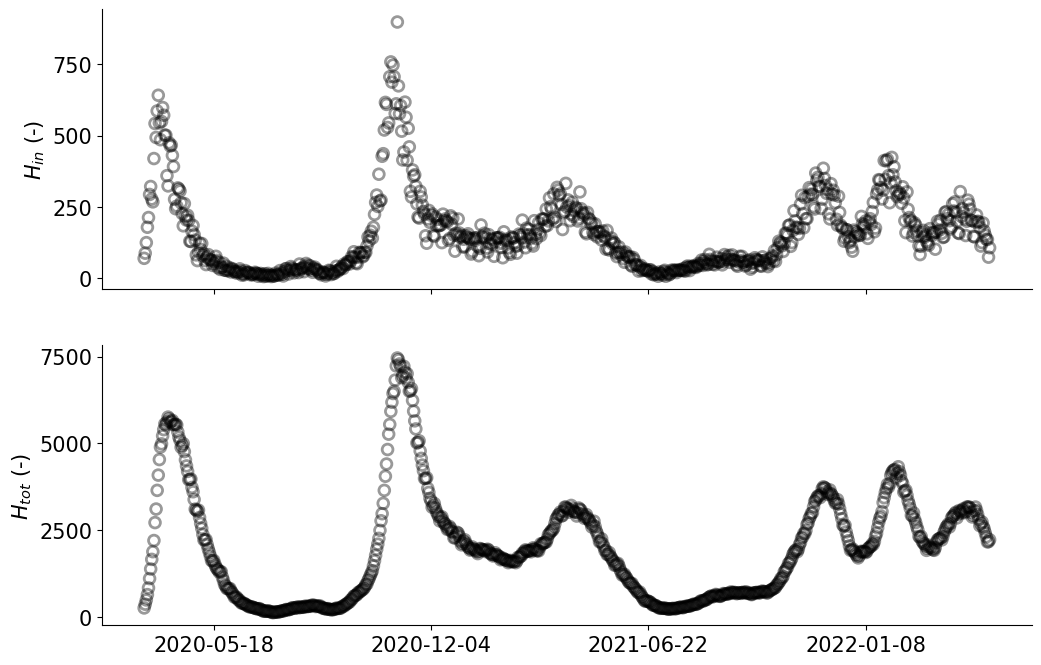

In [21]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(12,8),sharex=True)

ax1.scatter(df_sciensano.index,df_sciensano['H_in'], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)
ax2.scatter(df_sciensano.index,df_sciensano['H_tot'], color='black', alpha=0.4, linestyle='None', facecolors='none', s=60, linewidth=2)

ax1.set_ylabel('$H_{in}$ (-)', fontsize=15)
ax2.set_ylabel('$H_{tot}$ (-)', fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
    
ax1.grid(False)
ax2.grid(False)

ax1 = _apply_tick_locator(ax1)
ax2 = _apply_tick_locator(ax2)

fig.savefig('../../results/covid19_DTM/RESTORE/manuscript/data_sciensano.pdf', dpi=300, bbox_inches='tight')